In [1]:
import sys
sys.path.append(r"C:\Users\hjia9\Documents\GitHub\data-analysis")
sys.path.append(r"C:\Users\hjia9\Documents\GitHub\data-analysis\read")
from read_scope_data import read_trc_data

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

%matplotlib widget

In [2]:
probe = 'M3'
data_a = {}
data_b = {}
for ch in [1,2,3,4]:
    channel = 'C' + str(ch)

    ifn = f"C:\data\LAPD\JAN2024_diverging_B\mach-calibration\{channel}-Mach-calibrate-{probe}-a-00000.trc"
    sig, tarr = read_trc_data(ifn)
    data_a[ch] = gaussian_filter1d(sig, 100)

    ifn = f"C:\data\LAPD\JAN2024_diverging_B\mach-calibration\{channel}-Mach-calibrate-{probe}-b-00000.trc"
    sig, tarr = read_trc_data(ifn)
    data_b[ch] = gaussian_filter1d(sig, 100)

tarr *= 1e3

Reading data...
Done
Reading data...
Done
Reading data...
Done
Reading data...
Done
Reading data...
Done
Reading data...
Done
Reading data...
Done
Reading data...
Done


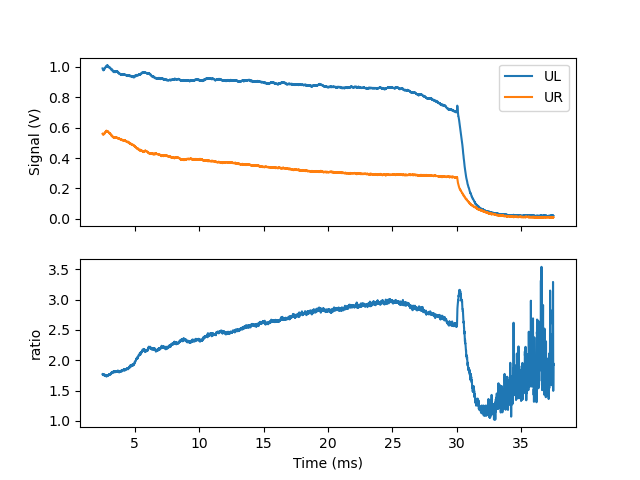

In [5]:
start = 250000
stop = 950000

fig, ax = plt.subplots(2, sharex=True)
ax[1].set_xlabel('Time (ms)')

ax[0].plot(tarr[start:stop], data_a[1][start:stop], label=f'UL')
ax[0].plot(tarr[start:stop], data_a[3][start:stop], label=f'UR')
ax[0].set_ylabel('Signal (V)')

sig =  data_a[1] / data_a[3]
ax[1].plot(tarr[start:stop], sig[start:stop])
ax[1].set_ylabel('ratio')

# print('average ratio:', np.mean(sig[start:stop]))
# print('standard deviation:', np.std(sig[start:stop]))

ax[0].legend()

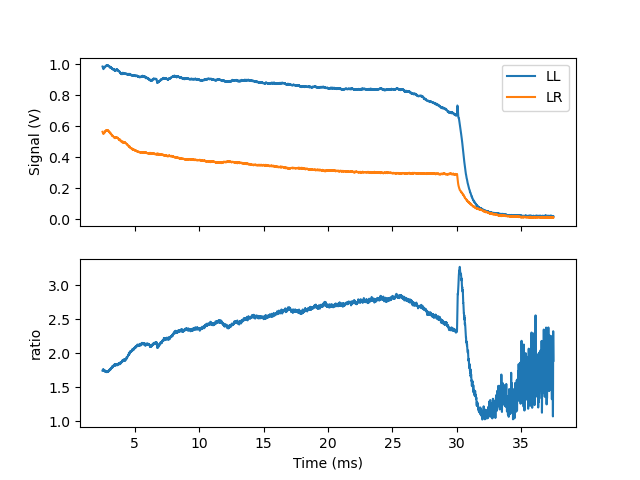

In [6]:
start = 250000
stop = 950000

fig, ax = plt.subplots(2, sharex=True)
ax[1].set_xlabel('Time (ms)')

ax[0].plot(tarr[start:stop], data_a[2][start:stop], label=f'LL')
ax[0].plot(tarr[start:stop], data_a[4][start:stop]/1.15, label=f'LR')
ax[0].set_ylabel('Signal (V)')

sig =  data_a[2] / (data_a[4]/1.15)
ax[1].plot(tarr[start:stop], sig[start:stop])
ax[1].set_ylabel('ratio')

# print('average ratio:', np.mean(sig[start:stop]))
# print('standard deviation:', np.std(sig[start:stop]))

ax[0].legend()

In [77]:
1/0.86

1.1627906976744187

# M3
Normalized area
C1 -- UL 1
C2 -- LL 1
C3 -- UR 1
C4 -- LR 1.15

## Side A
Channel C1 to C2
average ratio: 1.02
standard deviation: 0.016
Channel C3 to C4
average ratio: 0.87
standard deviation: 0.025

## Side B
Channel C1 to C2
average ratio: 0.97
standard deviation: 0.061
Channel C3 to C4
average ratio: 0.78
standard deviation: 0.015

A1 -- B4
average ratio: 0.88
standard deviation: 0.031
A4 -- B1
average ratio: 0.86
standard deviation: 0.029

A2 -- B3
average ratio: 1.1
standard deviation: 0.01
B2 -- A3
average ratio: 1.01
standard deviation: 0.04